## Bài làm mẫu

### Bài toán 1

> **Nhiệm vụ 1:** Xây dựng mô hình SVM để phân loại các loài hoa cẩm chướng

- Tải dữ liệu về, nạp dữ liệu, xem thông tin các feature có trong tập dữ liệu và chuẩn bị dữ liệu cho xây
dựng mô hình

- Bộ dữ liệu Iris (Iris Flower Dataset) là một trong những bộ dữ liệu nổi tiếng nhất trong lĩnh vực học máy.
- Nó được nhà thống kê học người Anh – Ronald A. Fisher giới thiệu năm 1936 trong bài báo:
    - **“The use of multiple measurements in taxonomic problems”**.
- Ông Fisher sử dụng dữ liệu này để minh họa phương pháp phân tích tuyến tính (Linear Discriminant Analysis – LDA).

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

- Dữ liệu Gồm 150 mẫu hoa, chia thành 3 loại (mỗi loại 50 mẫu).
- Dữ liệu thu thập từ 3 loài hoa Iris (Diên vĩ) thật trong tự nhiên:
    - Iris setosa: Cánh hoa ngắn, đài hoa to
    - Iris versicolor: Trung gian giữa 2 loài hoa kia
    - Iris virginica: Cánh hoa dài và to nhất
- Về mặt sinh học: Đây là 3 loài phổ biến nhất trong họ Iris mà Fisher chọn để nghiên cứu vì:
    - Chúng dễ phân biệt bằng các chỉ số hình thái (độ dài, rộng của đài hoa và cánh hoa);
    - Nhưng cũng có sự chồng lấn nhẹ giữa Versicolor và Virginica, tạo thành bài toán phân loại không hoàn toàn tách biệt → rất phù hợp để kiểm tra thuật toán phân loại.
- Về mặt thống kê: Nếu có quá nhiều loài (quá nhiều lớp), bài toán sẽ trở nên phức tạp hơn và khó minh họa trong không gian 2D hoặc 3D. Fisher chọn 3 lớp vừa đủ để:
    - dễ trực quan hóa;
    - có thể thử nghiệm các phương pháp phân loại khác nhau (LDA, SVM, kNN,…);
    - vẫn đảm bảo có hiện tượng chồng lấn để kiểm tra độ chính xác của mô hình.

- Fisher đã thu thập (hoặc sử dụng dữ liệu có sẵn) 50 bông hoa cho mỗi loài để đảm bảo tính cân bằng dữ liệu.
- Mỗi mẫu gồm 4 đặc trưng đo bằng cm:
    - sepal length: chiều dài đài hoa
    - sepal width: chiều rộng đài hoa
    - petal length: chiều dài cánh hoa
    - petal width: chiều rộng cánh hoa

In [ ]:
# Download&Load dữ liệu iris từ datasets của scikit-learn
iris = datasets.load_iris()

# Hiển thị mô ta dữ liệu, chỉ có trong các bộ dữ liệu chuẩn và mở để học tập và nghiên cứu
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

- **data**: ma trận chứa các đặc trưng (features: các giá trị đầu vào để mô hình học nhưng gì ta biết) của từng bông hoa.
    - mỗi hàng = 1 mẫu (1 bông hoa)
    - mỗi cột = 1 đặc trưng (thuộc tính đo được)
- **target**: đây là mảng chứa nhãn, tức là loài của từng bông hoa tương ứng với dòng trong data

In [ ]:
# Từ tập dữ liệu ban đầu, tách lấy ma trận biểu diễn các đặc trưng và nhãn.
data = iris.data
target = iris.target

In [ ]:
# TODO: Chia dữ liệu và nhãn thành 2 tập dữ liệu huấn luyện và dữ liệu kiểm tra theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=101)

- Tạo mô hình SVM với dữ liệu đã chuẩn bị

In [ ]:
from sklearn import svm

# khởi tạo mô hình phân lớp
clf = svm.SVC()

# Sử dụng phương thức 'fit' để huấn luyện mô hình với dữ liệu huấn luyện và nhãn huấn luyện
# fit (X,Y) với X là tập các đối tượng, Y là tập nhãn tương ứng của đối tượng.
clf.fit(X_train, y_train)

SVC()

- Đánh giá độ chính xác của mô hình

In [ ]:
# Tính độ chính xác trên tập huấn luyện và tập kiểm tra
train_acc = clf.score(X_train,y_train)
val_acc = clf.score(X_test,y_test)

print('Training accuracy: {}'.format(train_acc))

print('Validation accuracy: {}'.format(val_acc))

Training accuracy: 0.95
Validation accuracy: 0.9666666666666667


- Tìm tham số kernel tối ưu cho mô hình SVM

- Đây là 4 loại kernel mà SVM hỗ trợ:
    - linear: đường thẳng/phẳng (phân tách tuyến tính), khi dữ liệu dễ tách bằng 1 đường
    - poly: đa thức bậc 2, bậc 3,... khi dữ liệu phức tạp có đường cong
    - rbf: Radial Basis Function, Phổ biến nhất tách phi tuyết tối
    - sigmoid: dạng S-shaped như mạng nơ-ron. Ít dùng hơn nhưng vẫn có thể tốt trong vài trường hợp

In [ ]:
# best_svm, best_val_acc và best_kernel lần lượt là các biến lưu mô hình tốt nhất,
# độ chính xác cao nhất trên tập kiểm tra và kernel tốt nhất
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_svm = None
best_val_acc = -1
best_kernel = None
# Huấn luyện các mô hình dựa trên dữ liệu huấn luyện và tham số kernel
# Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra để tìm được mô hình tốt nhất
for i in range(4):
    clf = svm.SVC(kernel=kernels[i], probability=True)
    clf.fit(X_train, y_train)
    tmp_val_acc = clf.score(X_test, y_test)
    if (tmp_val_acc > best_val_acc):
        best_val_acc = tmp_val_acc
        best_svm = clf
        best_kernel = kernels[i]

# Hiển thị mô hình tốt nhất cùng với độ chính xác
print("Best validation accuracy : {} with kernel: {}".format(best_val_acc,
best_kernel))
# Mô hình tốt nhất của bạn nên có độ chính xác xấp xỉ 86,67%

Best validation accuracy : 1.0 with kernel: linear


### Bài toán 2

> **Nhiệm vụ 1**: Tìm hiểu về cách biểu diễn và hiển thị các ảnh từ tập dữ liệu là hình ảnh

- Đây là bộ dữ liệu có sẵn trong thư viện Scikit-learn
    - Gồm 1.797 hình ảnh chữ số viết tay (0–9).
    - Mỗi hình ảnh là ma trận 8×8 = 64 pixel, mỗi pixel mang giá trị từ 0 → 16 (mức xám).
    - Mỗi ảnh có một nhãn (label) tương ứng với số mà nó biểu diễn (0–9).

- Import thư viện và tải dữ liệu là tập các hình ảnh viết tay từ số 0 đến số 9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

- Cấu trúc dữ liệu:
    - digits.data: Dữ liệu ảnh phẳng (flattened), kích thước (1797, 64)
    - digits.images: Dạng ma trận 8×8 cho từng ảnh, kích thước (1797, 8, 8)
    - digits.target: Nhãn của từng ảnh (0–9), kích thước (1797,)

- Khảo sát thông tin có trong digits

In [ ]:
#thông tin toàn bộ dữ liệu đã tải về digits
#xem thông tin của một hình dưới dạng ma trận 8 x 8
digits['data'][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

- Có thể hiểu rằng là:
    - Mỗi hàng là 1 dòng pixel của ảnh.
    - Mỗi số thể hiện độ sáng tại vị trí đó. (số càng lớn thì tại vị trí đó điểm màu càng rõ)

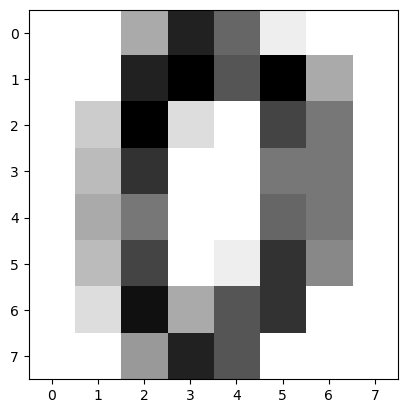

In [ ]:
plt.imshow(digits.images[0], cmap='gray_r')
plt.show()

- Dựa vào chữ viết tay số 0 này có thể nhận dạng được rằng là những vị trí có số càng lớn ở ma trận trên sẽ có màu đen rõ ràng hơn so với các vị trí khác cạnh nó.

In [ ]:
#xem thông tin của một hình dưới dạng mảng
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

- Dạng mảng 1D được hiển thị ra không phải để xem hình, mà để xác nhận rằng dữ liệu ảnh đã được chuyển đổi đúng thành dạng vector (feature vector) — là dạng bắt buộc để SVM (và hầu hết các mô hình học máy khác) có thể học được.

In [ ]:
#xem thông tin 9 nhãn đầu tiên
digits['target'][0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

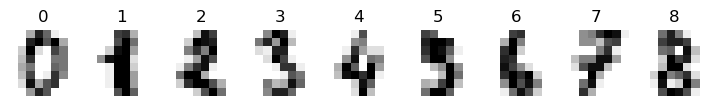

In [ ]:
fig, axes = plt.subplots(1, 9, figsize=(9, 2))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
    ax.set_title(digits.target[i])
    ax.axis('off')
plt.show()

- Vẽ ra hình dựa vào dữ liệu dạng ma trận 8 x 8

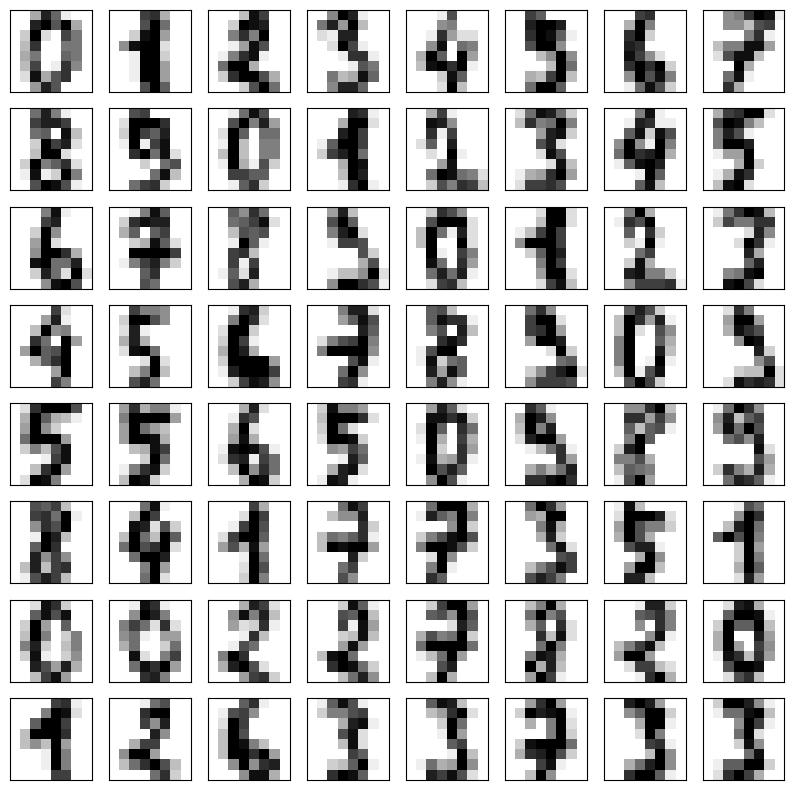

In [ ]:
# Each Digit is represented in digits.images as a matrix of 8x8 = 64 pixels. Each of the 64 values represent
# a greyscale. The Greyscale are then plotted in the right scale by the imshow method.
fig, ax = plt.subplots(8,8, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

- Vẽ một ảnh từ ma trận 8 x 8

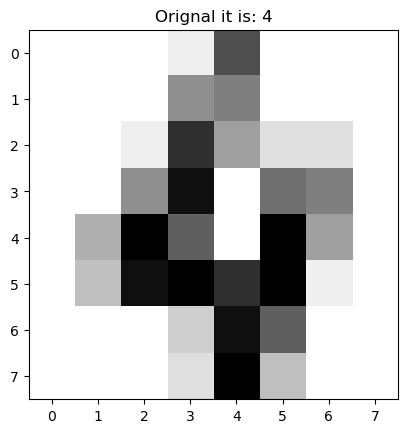

In [ ]:
# Hàm vẽ 1 ảnh có kích thước 8 x 8 (ảnh lấy từ ma images)
def view_digit(index):
    plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
    plt.title('Orignal it is: '+ str(digits.target[index]))
    plt.show()
# vẽ ảnh ở vị trí thứ 4
view_digit(4)

> **Nhiệm vụ 2**: Xây dựng mô hình SVM để nhận diện chữ viết tay từ 0 – 9

- Chuẩn bị dữ liệu và xây dựng mô hình SVM

In [ ]:
# Thực hiện import các thư viện cần thiết để xây dựng mô hình SVM
# Thực hiện bước 1 của nhiệm vụ 1
from sklearn import svm
main_data = digits['data']
targets = digits['target']
svc = svm.SVC(gamma=0.001 , C = 100)
# GAMMA is a parameter for non linear hyperplanes.
# The higher the gamma value it tries to exactly fit the training data set
# C is the penalty parameter of the error term.
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
svc.fit(main_data[:1500] , targets[:1500])
predictions = svc.predict(main_data[1501:])
# list(zip(predictions , targets[1501:]))

- C Là hệ số phạt lỗi (regularization parameter).
    - điều chỉnh mức độ nghiêm khắc của mô hình với các điểm bị phân loại sai.
        - C nhỏ: Cho phép sai một ít để có biên phân tách “mềm” → tổng quát tốt hơn
        - C lớn: Cố gắng phân loại mọi điểm cho thật đúng, biên hẹp hơn → dễ bị overfitting nếu dữ liệu nhiễu

- Gamma Là tham số riêng cho kernel RBF (Radial Basis Function), điều chỉnh độ cong của biên phân tách.
    - gamma nhỏ: Biên phân tách mượt, mô hình “nhìn xa” hơn → tránh overfit
    - gamma lớn: Biên cong gắt, chỉ tập trung vào điểm gần → có thể overfit

- Đánh giá hiệu quả của mô hình với Confusion Matrix

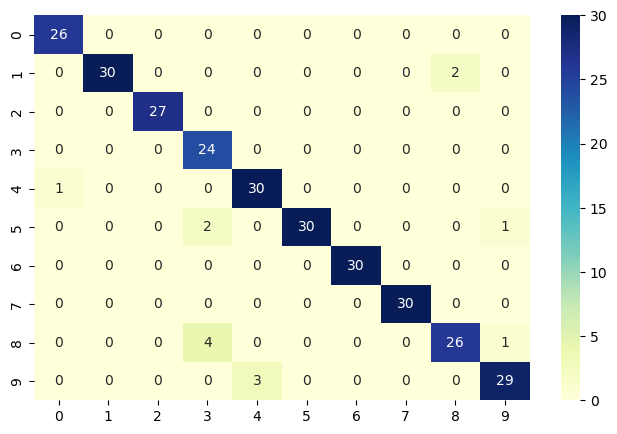

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(predictions, targets[1501:])
conf_matrix = pd.DataFrame(data = cm)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

Nhận xét:
- Trục hoành (x): là nhãn thật (actual labels — số thật trong ảnh).
- Trục tung (y): là kết quả mô hình dự đoán (predicted labels).
- Mỗi ô hiển thị số lượng mẫu tương ứng.
- Đường chéo chính (từ góc trên trái → góc dưới phải) là nơi mô hình dự đoán đúng.
- Ô ngoài đường chéo là những lỗi (misclassifications).
- Đa số các ô đậm màu nằm trên đường chéo chính → chứng tỏ mô hình SVM phân loại rất chính xác.
- Số lượng dự đoán đúng cho mỗi chữ số dao động quanh 24–30 mẫu, rất tốt.
- Các ô ngoài đường chéo chỉ có vài lỗi nhỏ (màu rất nhạt, số nhỏ như 1, 2, 3, 4).
=> Mô hình SVM hoạt động rất tốt trên bộ dữ liệu này.
<br><br>
- Mô hình hiểu rõ đặc trưng của từng chữ số (đường cong, nét thẳng, độ sáng).
- Một vài lỗi nhỏ như:
    - Số 3 và 9, hoặc 8 và 9 dễ nhầm vì chúng có nét cong tương tự.
    - Một số 5 hoặc 9 viết tay có thể trông gần giống nhau → SVM bị lẫn.
    - Điều này là hoàn toàn bình thường trong bài toán nhận dạng ảnh, nhất là khi:
        - Ảnh nhỏ (8×8 pixel, rất ít chi tiết);
        - Viết tay có nhiều biến thể hình dạng.

- In kết quả dạng văn bản

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions, targets[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296



- precision: Trong tất cả các mẫu mà mô hình dự đoán là số X, có bao nhiêu mẫu thật sự là X.
- recall: Trong tất cả các mẫu thật sự là số X, mô hình nhận ra được bao nhiêu.
- f1-score: Trung bình điều hòa giữa precision và recall (thể hiện cân bằng giữa 2 chỉ số trên).
- support: Số lượng mẫu thật sự thuộc lớp đó trong tập kiểm tra.

- Nhìn vào tổng thể:
    - accuracy = 0.95, 95% mẫu được dự đoán đúng hoàn toàn, Mức chính xác tổng thể cao
    - macro avg = 0.95, Trung bình đều giữa các lớp, Mô hình ổn định, không thiên lệch
    - weighted avg = 0.95, Trung bình có trọng số theo số lượng mẫu mỗi lớp, Tổng thể mô hình tốt, cân bằng

- Nhận xét chuyên sâu:
    - Độ chính xác chung đạt 95% → Mô hình rất tốt với dữ liệu hình ảnh nhỏ (8×8 pixel).
    - Các chữ số 2, 5, 6 được nhận diện hoàn hảo (F1 = 1.00).
    - Một số chữ số có precision thấp hơn (như 3, 8, 9) → có thể do hình dạng chữ viết tay của chúng dễ gây nhầm lẫn.
    - Chữ số 3 có recall = 1.00 nhưng precision = 0.80

<br>→ Mô hình nhận ra được tất cả số 3 thật, nhưng cũng dự đoán nhầm một số hình khác thành số 3 (hơi "quá tự tin").
Chữ số 8 có recall thấp nhất (0.84) → mô hình bỏ sót vài số 8 thật, thường nhầm với số 9.